In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import src.data.request_water_depth as request_water_depth
import src.data.water_depth as water_depth
import src.visualization.period_plot as period_plot

In [53]:
data_depth = water_depth.get()

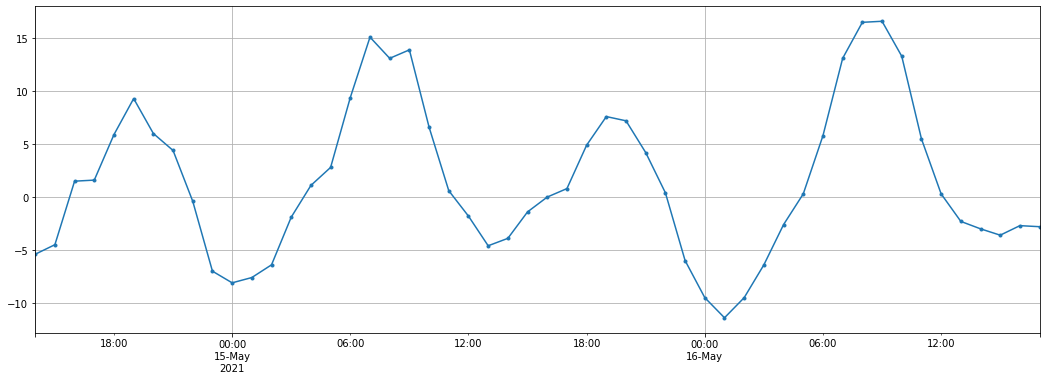

In [54]:
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
data_depth.plot(style='.-', ax=ax)
ax.grid()

In [55]:
periods = data_depth[::12]

In [56]:
df_depth = pd.DataFrame(index=data_depth.index)
df_depth['depth'] = data_depth 

In [57]:
df_depth.loc[periods.index,'period'] = np.arange(len(periods))
df_depth.fillna(method='ffill', inplace=True)

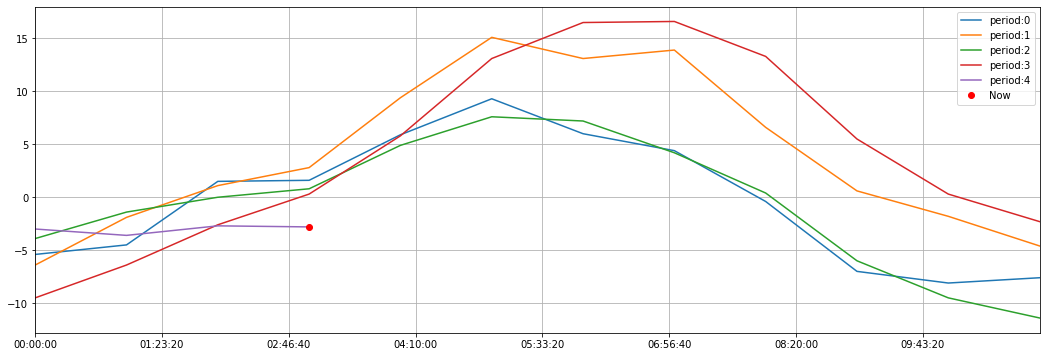

In [68]:
groups = df_depth.groupby(by=['period'])

fig,ax=plt.subplots()
fig.set_size_inches(18,6)

for period,group in groups:
    group.index-=group.index[0]
    
    group.plot(y='depth', ax=ax, label=f'period:{int(period)}')

group.iloc[[-1]].plot(y='depth', style='ro', label='Now', ax=ax)

ax.grid()

In [ ]:
period_plot